Лабораторна робота №6 Студентки групи БС-83 Харченко Софії

In [2]:
from numpy.random import randint
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [7]:
table1 = [59,64,60,65,70,72,68,71,66,75]
table2=[]
table2 = [65,68,63,74,80,79,74,85,91,90]
table = pd.DataFrame({
    'Стан спокою': table1,
    'Після фізичної нагрузки': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Пульс(ударів за хвилину)'
df.index.name = 'Пацієнт'
df

Пульс(ударів за хвилину),Стан спокою,Після фізичної нагрузки
Пацієнт,,
1,59,65
2,64,68
3,60,63
4,65,74
5,70,80
6,72,79
7,68,74
8,71,85
9,66,91


2.Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)


[Text(0.5, 0, 'Пульс')]

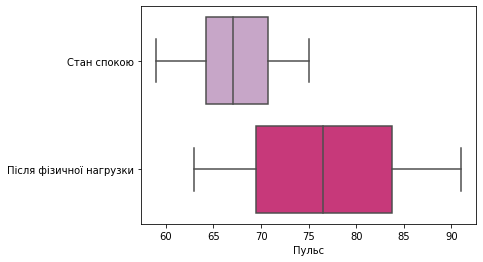

In [10]:
sns.boxplot(data=table, orient='h',palette='PuRd').set(xlabel='Пульс')

3. Написати функції:
для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [15]:
def Pirson(col_b, col_a):
    n=len(col_b) #n - кількість
    
    sum_product = 0
    for i in range(len(col_b)):
        sum_product += col_b[i] * col_a[i] 
    
    sum_b=sum(col_b)
    sum_a=sum(col_a)
    
    sum_sum_b = sum_b**2
    sum_sum_a = sum_a**2
    
    sum_sq_b = 0
    sum_sq_a = 0
    for i in range(len(col_b)):
        sum_sq_b += col_b[i] **2
        sum_sq_a += col_a[i] **2
        
    r=((n*sum_product) - (sum_b*sum_a))/math.sqrt(((n*sum_sq_b) - sum_sum_b) * ((n*sum_sq_a) - sum_sum_a))
    print("Коефіцієнт Пірсона: r = ", r)
    
    #Розраховуємо число ступенів свободи
    df = n-2
    print("Число ступенів свободи: df = ", df)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('PairedCriterion.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    r_tabl = sheet.row_values(df)[1] 
    print("Критичне значення: r_tabl = ",r_tabl)
    
    if(r_tabl < r):
        result = "significant" #існує статистично значима залежність між групами 
    else:
        result = "not significant" #не існує статистично значима залежність між групами
    print("Результат оцінки значимості зв'язку:", result)

In [16]:
Pirson(table1, table2)

Коефіцієнт Пірсона: r =  0.7905364087221353
Число ступенів свободи: df =  8
Критичне значення: r_tabl =  2.306
Результат оцінки значимості зв'язку: not significant


Функція для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

In [17]:
def Student(column1, column2):
    d = []
    n = len(column1)
    for i in range(n):
        d.append(column1[i] - column2[i])
    Mid = sum(d)/n 
    qd = np.std(d, ddof = 1)
   
    t = (Mid/qd)*math.sqrt(n)
    print('')
    print("Значення критерію Стюдента: t = ", t)
    
    df = n - 1
    print("Значення ступенів свободи: df = ", df)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('Stud.xlsx')
    sheet = rb.sheet_by_index(0)
    t_t = sheet.row_values(df)[1] 
    print("Критичне значення: = ",t_t)
    
    if(t_t < t):
        result = "significant" 
    else:
        result = "not significant" 
    print("Результат оцінки значимості зв'язку:", result)

In [18]:
Student(table1,table2)


Значення критерію Стюдента: t =  -4.738222327749353
Значення ступенів свободи: df =  9
Критичне значення: =  0.6021
Результат оцінки значимості зв'язку: not significant


Висновок:
Проаналізувавши дані, можна зробити висновок що:
1.За коефіцієнтом кореляції Пірсона було доведено, що немає статистичної залежності між групами ; 
2.Виявлена наявність статистично значущих відмінностей між двома таблицями таних(пульс до та після нагрузки), адже отримане значення критерію Стьюдента є більшим за критичне. Під час аналізу  була прийнята альтернативна гіпотеза про відмінність середніх